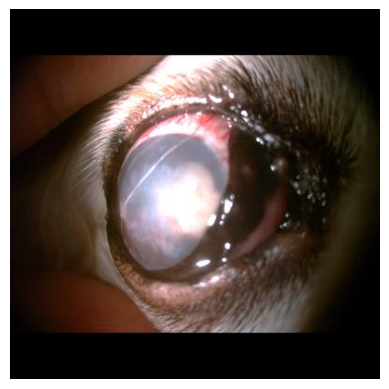

In [141]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

data = cv2.imread('crop_D0_0d4f0dab-60a5-11ec-8402-0a7404972c70.png')
data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(data)

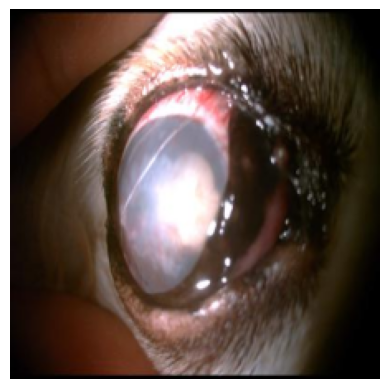

In [142]:
gray = cv2.cvtColor(data, cv2.COLOR_RGB2GRAY)

# 이진화
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# 컨투어 찾기
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
best_cnt = None
# 눈알 영역만 추출
for countour in contours:
    area = cv2.contourArea(countour)
    if area > max_area:
        max_area = area
        best_cnt = countour

x, y, w, h = cv2.boundingRect(best_cnt)
data = data[y:y+h, x:x+w]
resize_eye = cv2.resize(data, dsize=(224, 224), interpolation=cv2.INTER_AREA)
plt.axis('off')
plt.imshow(resize_eye)

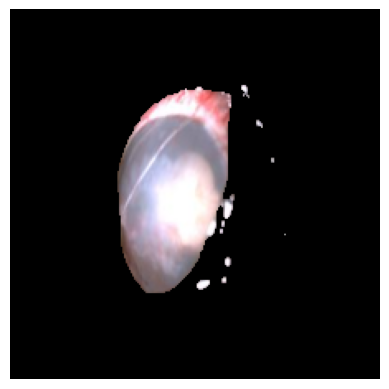

In [143]:
# grabcut 이용하여 배경 제거

mask = np.zeros(resize_eye.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (40,40,400,178)
cv2.grabCut(resize_eye, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
final = resize_eye * mask2[:,:,np.newaxis]

plt.axis('off')
plt.imshow(final)

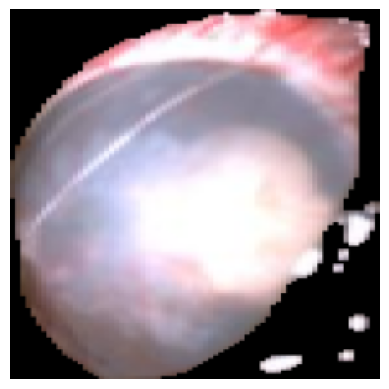

In [136]:
gray = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)

# 이진화
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

# 컨투어 찾기
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
best_cnt = None
# 눈알 영역만 추출
for countour in contours:
    area = cv2.contourArea(countour)
    if area > max_area:
        max_area = area
        best_cnt = countour

x, y, w, h = cv2.boundingRect(best_cnt)
final = final[y:y+h, x:x+w]
resize_eye = cv2.resize(final, dsize=(224, 224), interpolation=cv2.INTER_AREA)
plt.axis('off')
plt.imshow(resize_eye)

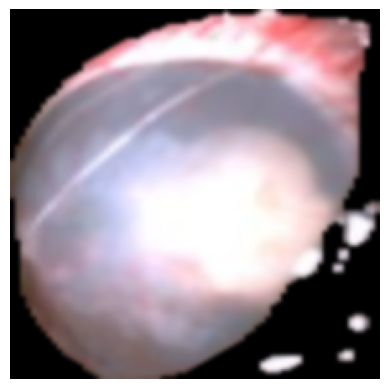

In [137]:
blurred = cv2.GaussianBlur(resize_eye, (5, 5), 1.2)
plt.axis('off')
plt.imshow(blurred)

### 최종 코드

In [148]:
def data_preprocessing(file_name):
    data = cv2.imread(file_name)
    data = cv2.cvtColor(data, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(data, cv2.COLOR_RGB2GRAY)

    # 이진화
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

    # 컨투어 찾기
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    max_area = 0
    best_cnt = None
    # 눈알 영역만 추출
    for countour in contours:
        area = cv2.contourArea(countour)
        if area > max_area:
            max_area = area
            best_cnt = countour

    x, y, w, h = cv2.boundingRect(best_cnt)
    data = data[y:y+h, x:x+w]
    resize_eye = cv2.resize(data, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    
    mask = np.zeros(resize_eye.shape[:2], np.uint8)
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)

    rect = (40,40,400,178)
    cv2.grabCut(resize_eye, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    final = resize_eye * mask2[:,:,np.newaxis]
    
    gray = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)
    # 이진화
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)

    # 컨투어 찾기
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    max_area = 0
    best_cnt = None
    # 눈알 영역만 추출
    for countour in contours:
        area = cv2.contourArea(countour)
        if area > max_area:
            max_area = area
            best_cnt = countour

    x, y, w, h = cv2.boundingRect(best_cnt)
    final = final[y:y+h, x:x+w]
    resize_eye = cv2.resize(final, dsize=(224, 224), interpolation=cv2.INTER_AREA)
    
    blurred = cv2.GaussianBlur(resize_eye, (5, 5), 1.2)
    plt.axis('off')
    plt.imshow(blurred)

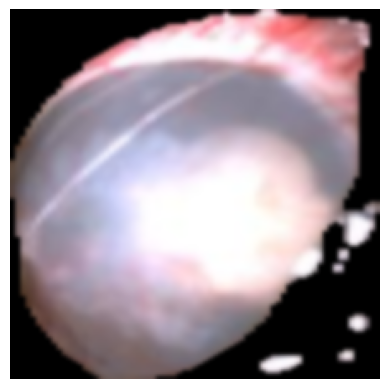

In [149]:
data_preprocessing('crop_D0_0d4f0dab-60a5-11ec-8402-0a7404972c70.png')